使用工业数据集风机结冰，首先型观察查看数据类

In [1]:
import os
import numpy as np
import pandas as pd
import csv
# This line tells the notebook to show plots inside of the notebook
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
os.chdir('D:\\ice_data\\train\\15')
ice_data_15=pd.read_csv('15_data.csv', na_values=['NA'])

fail_15=pd.read_csv('15_failureInfo.csv')
normal_15=pd.read_csv('15_normalInfo.csv')
ice_data_15.head()

,time,wind_speed,generator_speed,power,wind_direction,wind_direction_mean,yaw_position,yaw_speed,pitch1_angle,pitch2_angle,...,acc_y,environment_tmp,int_tmp,pitch1_ng5_tmp,pitch2_ng5_tmp,pitch3_ng5_tmp,pitch1_ng5_DC,pitch2_ng5_DC,pitch3_ng5_DC,group
0,2015-11-01 20:20:16,1.859993,1.223595,2.515790,-2.072739,-2.073627,-0.655343,0.030804,0.555556,0.506667,...,0.061109,-0.403919,0.014918,1.307692,1.123077,0.783077,1.36,0.00,1.56,1
1,2015-11-01 20:20:23,1.911625,1.293394,2.313551,-2.010591,-1.615140,-0.655343,0.030804,0.195556,0.133333,...,-1.209522,-0.421277,-0.002291,1.307692,1.123077,0.783077,0.44,2.88,-2.60,1
2,2015-11-01 20:20:30,1.635027,1.280099,2.507799,-2.053750,-0.282742,-0.649566,0.170338,0.964444,0.951111,...,0.061109,-0.421277,-0.002291,1.307692,1.123077,0.783077,1.76,0.60,2.56,1
3,2015-11-01 20:20:37,1.786234,1.280099,2.349593,-2.007138,-2.234477,-0.655343,-0.004080,0.168889,0.137778,...,0.061109,-0.403919,-0.002291,1.307692,1.123077,0.783077,2.80,-0.48,0.12,1
4,2015-11-01 20:20:47,1.786234,1.263480,2.321566,-2.264365,-1.428959,-0.637917,0.414524,0.182222,0.168889,...,-1.209522,-0.403919,0.014918,1.307692,1.123077,0.783077,-0.88,1.72,0.92,1


In [3]:
normal_start=[]
for x in normal_15.startTime:
    normal_start.append(x)
# print(normal_start)
normal_end=[]
for x in normal_15.endTime:
    normal_end.append(x)
# print(normal_end)
normal_time=list(zip(normal_start,normal_end))
print(normal_time)

[('2015-11-01 20:20:16', '2015-11-03 23:47:32'), ('2015-11-04 14:04:51', '2015-11-04 18:26:08'), ('2015-11-05 11:06:59', '2015-11-09 02:44:31'), ('2015-11-09 12:30:09', '2015-11-09 19:23:32'), ('2015-11-10 00:04:50', '2015-11-15 23:03:06'), ('2015-11-17 11:37:50', '2015-11-20 22:35:45'), ('2015-11-21 11:10:51', '2015-11-22 22:50:24'), ('2015-11-23 11:50:58', '2015-11-23 16:47:57'), ('2015-11-26 08:46:48', '2015-11-29 00:05:50'), ('2015-11-29 11:48:50', '2015-11-29 14:22:15'), ('2015-11-30 10:11:06', '2015-11-30 16:50:17'), ('2015-12-01 13:30:37', '2015-12-03 15:14:13'), ('2015-12-03 21:22:30', '2015-12-04 18:43:01'), ('2015-12-05 14:13:10', '2015-12-05 15:32:16'), ('2015-12-06 13:00:58', '2015-12-07 14:26:30'), ('2015-12-09 08:00:09', '2015-12-09 13:45:04'), ('2015-12-10 07:22:36', '2015-12-11 22:40:24'), ('2015-12-12 12:06:00', '2015-12-12 13:11:04'), ('2015-12-12 22:01:28', '2015-12-12 22:16:45'), ('2015-12-13 11:05:39', '2015-12-13 20:27:05'), ('2015-12-14 12:29:58', '2015-12-15 19:

In [4]:
os.chdir('D:\\ice_data\\train\\21')
ice_data_21=pd.read_csv('21_data.csv', na_values=['NA'])
ice_data_21.head()
fail_21=pd.read_csv('21_failureInfo.csv')
normal_21=pd.read_csv('21_normalInfo.csv')

In [5]:
fail_start_21=[]
for x in fail_21.startTime:
    fail_start_21.append(x)
# print(fail_start)
fail_end_21=[]
for x in fail_21.endTime:
    fail_end_21.append(x)
# print(fail_end)
fail_time_21=list(zip(fail_start_21,fail_end_21))
print(fail_time_21)

[('2015-11-04 22:15:38', '2015-11-04 23:33:34'), ('2015-11-09 03:21:59', '2015-11-09 05:14:21'), ('2015-11-09 21:26:12', '2015-11-09 23:18:44'), ('2015-11-13 02:59:06', '2015-11-13 04:51:38'), ('2015-11-16 15:31:41', '2015-11-16 15:57:18'), ('2015-11-23 20:40:43', '2015-11-23 22:33:13'), ('2015-11-24 05:42:01', '2015-11-24 06:31:03'), ('2015-11-24 14:58:55', '2015-11-24 16:51:37'), ('2015-11-25 20:55:26', '2015-11-25 22:48:07'), ('2015-11-26 01:47:51', '2015-11-26 03:40:39'), ('2015-11-28 04:15:31', '2015-11-28 06:08:06'), ('2015-11-29 04:29:53', '2015-11-29 06:22:11'), ('2015-11-29 17:44:50', '2015-11-30 08:52:42'), ('2015-11-30 15:04:31', '2015-11-30 16:54:57')]


In [6]:
normal_start_21=[]
for x in normal_21.startTime:
    normal_start_21.append(x)
# print(normal_start)
normal_end_21=[]
for x in normal_21.endTime:
    normal_end_21.append(x)
# print(normal_end)
normal_time_21=list(zip(normal_start_21,normal_end_21))
print(normal_time_21)

[('2015-11-01 17:33:56', '2015-11-04 19:42:35'), ('2015-11-05 11:06:58', '2015-11-09 01:23:21'), ('2015-11-09 12:20:10', '2015-11-09 19:27:44'), ('2015-11-10 12:43:11', '2015-11-13 00:38:54'), ('2015-11-13 09:10:07', '2015-11-15 16:35:22'), ('2015-11-17 12:14:11', '2015-11-23 18:41:59'), ('2015-11-24 01:24:28', '2015-11-24 02:39:43'), ('2015-11-24 10:49:16', '2015-11-24 12:12:22'), ('2015-11-25 18:00:45', '2015-11-25 18:56:39'), ('2015-11-26 10:10:29', '2015-11-28 02:16:54'), ('2015-11-28 11:52:25', '2015-11-29 02:30:52'), ('2015-11-29 11:48:35', '2015-11-29 14:36:44'), ('2015-11-30 10:11:49', '2015-11-30 13:08:09'), ('2015-12-01 01:09:39', '2015-12-01 18:59:11')]


In [7]:
ice_data_15.describe()

,wind_speed,generator_speed,power,wind_direction,wind_direction_mean,yaw_position,yaw_speed,pitch1_angle,pitch2_angle,pitch3_angle,...,acc_y,environment_tmp,int_tmp,pitch1_ng5_tmp,pitch2_ng5_tmp,pitch3_ng5_tmp,pitch1_ng5_DC,pitch2_ng5_DC,pitch3_ng5_DC,group
count,393886.000000,393886.000000,393886.000000,393886.000000,393886.000000,393886.000000,393886.000000,393886.000000,393886.000000,393886.000000,...,393886.000000,393886.000000,393886.000000,393886.000000,393886.000000,393886.000000,393886.000000,393886.000000,393886.000000,393886.000000
mean,-0.191960,-0.179717,-0.186445,-0.038769,-0.029129,0.062334,-0.003912,0.358042,0.354336,0.364184,...,-0.152925,-0.434677,-0.489827,0.901730,0.903601,0.877262,0.221418,0.379987,0.347584,1924.584926
std,0.914071,0.986147,0.904671,1.066382,1.142581,0.916932,0.176156,0.718962,0.715185,0.717325,...,0.692905,1.064107,1.099583,0.239209,0.238215,0.220438,1.033161,0.983804,1.148018,1111.546402
min,-2.292657,-2.382734,-1.119719,-5.333827,-9.270093,-1.767166,-2.445940,0.080000,0.066667,0.088889,...,-8.833311,-2.692108,-3.025473,0.429231,0.398462,0.446154,-3.720000,-3.720000,-3.280000,1.000000
25%,-0.835910,-1.159574,-0.875135,-0.784877,-0.777959,-0.614620,-0.038964,0.204444,0.204444,0.208889,...,0.061109,-1.241870,-1.400106,0.692308,0.692308,0.676923,-0.640000,-0.440000,-0.520000,960.000000
50%,-0.356474,-0.441632,-0.537001,-0.071892,-0.028168,-0.370142,-0.004080,0.217778,0.217778,0.217778,...,0.061109,-0.482822,-0.614194,0.875385,0.875385,0.860000,0.000000,0.240000,0.200000,1923.000000
75%,0.296296,0.964338,0.279006,0.696337,0.734287,1.050084,0.065687,0.328889,0.320000,0.324444,...,0.061109,0.306209,0.435601,1.090769,1.090769,1.061538,0.920000,1.120000,1.400000,2888.000000
max,5.835621,1.542680,2.579883,5.417923,7.549526,3.110697,5.228478,10.195556,10.160000,10.200000,...,7.684898,2.813749,1.814295,1.476923,2.444615,1.615385,3.280000,3.600000,3.240000,3853.000000


In [8]:
ice_data_21.describe()

,wind_speed,generator_speed,power,wind_direction,wind_direction_mean,yaw_position,yaw_speed,pitch1_angle,pitch2_angle,pitch3_angle,...,acc_y,environment_tmp,int_tmp,pitch1_ng5_tmp,pitch2_ng5_tmp,pitch3_ng5_tmp,pitch1_ng5_DC,pitch2_ng5_DC,pitch3_ng5_DC,group
count,190494.000000,190494.000000,190494.000000,190494.000000,190494.000000,190494.000000,190494.000000,190494.000000,190494.000000,190494.000000,...,190494.000000,190494.000000,190494.000000,190494.000000,190494.000000,190494.000000,190494.000000,190494.000000,190494.000000,190494.000000
mean,0.392116,0.425348,0.401454,-0.005768,-0.003039,-0.473701,-0.005544,0.537901,0.533264,0.535282,...,0.550401,0.399826,0.410889,0.893348,0.884253,0.883127,0.513170,0.647420,0.525722,928.391850
std,1.045154,0.922357,1.054978,0.949884,0.939013,0.931879,0.125802,1.133697,1.135577,1.140477,...,1.209042,0.923647,0.859437,0.240665,0.242486,0.242044,1.428496,1.437043,1.203946,535.318174
min,-1.853789,-1.285878,-1.117727,-4.993735,-6.363390,-2.651936,-1.713382,0.088889,0.088889,0.088889,...,-17.727731,-2.078242,-2.164985,0.538462,0.538462,0.538462,-3.400000,-3.360000,-3.720000,1.000000
25%,-0.286403,-0.312003,-0.456902,-0.663601,-0.613309,-1.324757,-0.038964,0.204444,0.204444,0.208889,...,0.061109,-0.200349,-0.136145,0.692308,0.692308,0.692308,-0.600000,-0.600000,-0.120000,466.000000
50%,0.281544,0.784852,0.208914,-0.032186,-0.010437,0.083821,-0.004080,0.222222,0.222222,0.222222,...,0.061109,0.337770,0.512089,0.815385,0.815385,0.798462,0.400000,0.880000,0.560000,924.000000
75%,0.882682,1.250185,1.101059,0.656631,0.615233,0.374893,0.030804,0.364444,0.342222,0.360000,...,1.331741,1.346152,1.104870,1.061538,1.076923,1.061538,1.680000,1.960000,1.040000,1393.000000
max,5.791365,1.509442,2.623939,3.914266,8.084005,0.741586,2.054059,9.840000,9.840000,9.871111,...,17.849949,2.608601,2.041846,1.738462,1.461538,1.553846,3.920000,3.760000,4.160000,1854.000000


数据来源网站对数据的解释
>训练与测试数据集描述
'train'数据集中包括两个风机的数据，存在两个以风机编号命名的文件夹中。每个文件夹中的数据包括三个文件：
  •  编号_data.csv：风机连续时间内的SCADA原始数据（详细内容如表一所示）。  
  •  编号_normalinfo.csv：风机正常状态的时间段，第一列为起始时间，第二列为结束时间。  
  •  编号_failureinfo.csv：风机结冰故障的时间段，第一列为起始时间，第二列为结束时间。  
风机正常时间区间和风机结冰时间区间均不覆盖的数据视为无效数据。  
'test'测试数据集和'final'最终数据集，数据集中同样有若干个以风机编号为命名的文件夹，每个文件夹中包括一个文件：  
  •  编号_data.csv：风机连续时间内的SCADA原始数据。  
需要注意的是，'train'数据集中'time'变量和一列为真实的时间戳，会存在数据不连续的情况，期间会出现停机或人为删除部分数据的情况；'test'和'final'数据集中的'time'变量为连续的数字序号，序号的排列是按照时间的先后顺序，但中间会存在由于停机等原因造成的数据不连续情况。  

通过时间的分割，为数据打上标签

In [9]:
len_15=len(ice_data_15)
label_15=[-1]*len_15
m=0
n=0
for i in range(len_15):
    if(ice_data_15.time[i]>=fail_15.startTime[m] and ice_data_15.time[i]<=fail_15.endTime[m]):
        label_15[i]=1
    elif(ice_data_15.time[i]>fail_15.endTime[m]and m<len(fail_15.endTime)-1):
        m+=1
    if(ice_data_15.time[i]>=normal_time[n][0] and ice_data_15.time[i]<=normal_time[n][1]):
        label_15[i]=0
    elif(ice_data_15.time[i]>normal_time[n][1] and n<len(normal_time)-1):
        n+=1
with open("D:/ice_data/train_clean/train_cleanlabel_15.csv",'w',encoding='utf-8',newline='') as lp:
    writer = csv.writer(lp)
    writer.writerow(label_15)

In [10]:
len_21=len(ice_data_21)
label_21=[-1]*len_21
m=0
n=0
for i in range(len_21):
    if(ice_data_21.time[i]>=fail_21.startTime[m] and ice_data_21.time[i]<=fail_21.endTime[m]):
        label_21[i]=1
    elif(ice_data_21.time[i]>fail_21.endTime[m] and n<len(fail_21.endTime)-1):
        m+=1
    if(ice_data_21.time[i]>=normal_time_21[n][0] and ice_data_21.time[i]<=normal_time_21[n][1]):
        label_21[i]=0
    elif(ice_data_21.time[i]>normal_time_21[n][1] and n<len(normal_time_21)-1):
        n+=1
with open("D:/ice_data/train_clean/train_cleanlabel_21.csv",'w',encoding='utf-8',newline='') as lp:
    writer = csv.writer(lp)
    writer.writerow(label_21)

定义一个函数查看数据情况

In [11]:
def data_judge(labels,num):
    sum_inv = 0
    for i in range(len(labels)):
        if(labels[i] == -1):
            sum_inv = sum_inv + 1
    print("Num of invalid data : %d , %.2f %%" % (sum_inv,sum_inv/num*100))
    
    sum_nor = 0
    for i in range(len(labels)):
        if(labels[i] == 0):
            sum_nor = sum_nor + 1
    print("Num of normal data : %d , %.2f %% " % (sum_nor,sum_nor/num*100))
    sum_fail = 0
    for i in range(len(labels)):
        if(labels[i] == 1):
            sum_fail = sum_fail + 1
    print("Num of failure data : %d , %.2f %% " % (sum_fail,sum_fail/num*100))


数据没有进行清理时

In [12]:
data_judge(label_21,len_21)
data_judge(label_15,len_15)

Num of invalid data : 10926 , 5.74 %
Num of normal data : 168930 , 88.68 % 
Num of failure data : 10638 , 5.58 % 
Num of invalid data : 19739 , 5.01 %
Num of normal data : 350255 , 88.92 % 
Num of failure data : 23892 , 6.07 % 


In [13]:
y=[]
y = label_15
indexes = []
normalindex = []
failindex = []
for i in range(len(y)):
    if(y[i] == -1):
        indexes.append(i)
    elif(y[i]==1):
        normalindex.append(i)
    elif(y[i]== 0):
        failindex.append(i)
ice_data_15 = ice_data_15.drop(indexes)
ice_data_15 = ice_data_15.drop('time',axis=1)

for i in range(len(y)-1,-1,-1):
    if(y[i]==-1):
        y.pop(i)
label_15_clean=y

In [14]:
y=[]
y = label_21
indexes = []
normalindex = []
failindex = []
for i in range(len(y)):
    if(y[i] == -1):
        indexes.append(i)
    elif(y[i]==1):
        normalindex.append(i)
    elif(y[i]== 0):
        failindex.append(i)
ice_data_21 = ice_data_21.drop(indexes)
ice_data_21 = ice_data_21.drop('time',axis=1)

for i in range(len(y)-1,-1,-1):
    if(y[i]==-1):
        y.pop(i)
label_21_clean=y

In [15]:
data_judge(label_15_clean,len(label_15_clean))
data_judge(label_21_clean,len(label_21_clean))

Num of invalid data : 0 , 0.00 %
Num of normal data : 350255 , 93.61 % 
Num of failure data : 23892 , 6.39 % 
Num of invalid data : 0 , 0.00 %
Num of normal data : 168930 , 94.08 % 
Num of failure data : 10638 , 5.92 % 


从上述数据可以明显看到数据集是很倾斜的，主要的数据都是正常数据，当我们去掉无效数据后，可以发现这个数据集的不平衡很严重。
接下来我们想看一看数据与数据之间的关系。

In [16]:
os.chdir('D:\\ice_data\\train_clean')

In [17]:
ice_data_15_clean=ice_data_15

In [18]:
print(type(ice_data_15_clean))
ice_data_15_clean.insert(0,'label',label_15_clean)
ice_data_21_clean=ice_data_21
print(type(ice_data_21_clean))
ice_data_21_clean.insert(0,'label',label_21_clean)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


sb.pairplot(ice_data_15_clean.dropna(),vars=['wind_speed','generator_speed','power','wind_direction'], hue='label').savefig("output_15.png")


sb.pairplot(ice_data_21_clean.dropna(),vars=['wind_speed','generator_speed','power','wind_direction'], hue='label').savefig("output_21.png")

sb.pairplot(ice_data_15_clean.dropna(),hue='label').savefig("output_15_all.png")
sb.pairplot(ice_data_21_clean.dropna(),hue='label').savefig("output_21_all.png")
>这段代码的运行时间较长，已经将结果存入文件夹

通过观察上述图片，我们发现，风机是否结冰，在各个特征上都发生了严重的重合。也许我们应当对其进行降维。
由于我们已经有类别标签，所以我们可以尝试使用LDA对数据进行降维。
降维前的数据在三维空间内的情况
![Pandao editor.md](http://images2015.cnblogs.com/blog/1042406/201701/1042406-20170104165723722-2134679474.png)
降维后的数据在三维空间内的情况
![Pandao editor.md](http://images2015.cnblogs.com/blog/1042406/201701/1042406-20170104170133503-1519821205.png)

In [19]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
lda = LinearDiscriminantAnalysis( solver='svd', shrinkage=None,n_components=1)
lda.fit(ice_data_21,label_21_clean)
X_new = lda.transform(ice_data_21)


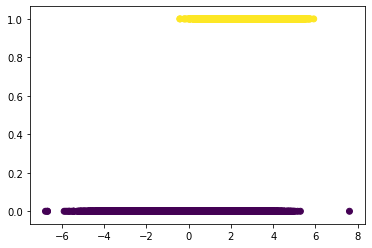

In [21]:
plt.scatter(X_new,label_21_clean,marker='o',c=label_21_clean)
plt.show()

在LDA过程中，我们需要把维数降低到$min(feature\_n,n\_label-1)$也就是1维上。效果不太理想。

对我们的实验数据，johnson_lindenstrauss引理并不好用，因为我们的特征只有28维。
>According to the JL lemma, projecting 500 samples without too much distortion will require at least several thousands dimensions, irrespective of the number of features of the original dataset.

>Hence using random projections on the digits dataset which only has 64 features in the input space does not make sense: it does not allow for dimensionality reduction in this case.

>On the twenty newsgroups on the other hand the dimensionality can be decreased from 56436 down to 10000 while reasonably preserving pairwise distances.


In [42]:
ice_data_21.to_csv('train_cleandata_21.csv',index = False, sep=',', header=True)

In [41]:
ice_data_15.to_csv('train_cleandata_15.csv',index = False, sep=',', header=True)

过度采样和欠采样背后的基本理论概念非常简单：

对于欠采样，我们从类别中随机选择样本的子集，以获取更多实例，以匹配来自每个类别的样本数量。为了使数据量是平均的，我们选择正常样本的$1/10$作为正样本。欠采样的主要缺点是我们会从遗漏的样本中丢失潜在的相关信息。

通过过采样，我们可以用较少的实例随机地复制该类中的样本，或者根据现有数据生成其他实例，以匹配每个类中的样本数。尽管我们避免使用这种方法丢失信息，但是我们也存在过拟合模型的风险，因为我们更有可能在训练和测试数据中获得相同的样本，即测试数据不再独立于训练数据。这将导致对我们模型的性能和可概括性的高估。

但实际上，我们不应该简单地对训练数据进行过采样或过采样，然后运行模型。我们需要考虑交叉验证，并在每个折叠上独立执行过采样或欠采样，以诚实地评估模型性能！

,label,wind_speed,generator_speed,power,wind_direction,wind_direction_mean,yaw_position,yaw_speed,pitch1_angle,pitch2_angle,...,acc_y,environment_tmp,int_tmp,pitch1_ng5_tmp,pitch2_ng5_tmp,pitch3_ng5_tmp,pitch1_ng5_DC,pitch2_ng5_DC,pitch3_ng5_DC,group
0,0,1.859993,1.223595,2.515790,-2.072739,-2.073627,-0.655343,0.030804,0.555556,0.506667,...,0.061109,-0.403919,0.014918,1.307692,1.123077,0.783077,1.36,0.00,1.56,1
1,0,1.911625,1.293394,2.313551,-2.010591,-1.615140,-0.655343,0.030804,0.195556,0.133333,...,-1.209522,-0.421277,-0.002291,1.307692,1.123077,0.783077,0.44,2.88,-2.60,1
2,0,1.635027,1.280099,2.507799,-2.053750,-0.282742,-0.649566,0.170338,0.964444,0.951111,...,0.061109,-0.421277,-0.002291,1.307692,1.123077,0.783077,1.76,0.60,2.56,1
3,0,1.786234,1.280099,2.349593,-2.007138,-2.234477,-0.655343,-0.004080,0.168889,0.137778,...,0.061109,-0.403919,-0.002291,1.307692,1.123077,0.783077,2.80,-0.48,0.12,1
4,0,1.786234,1.263480,2.321566,-2.264365,-1.428959,-0.637917,0.414524,0.182222,0.168889,...,-1.209522,-0.403919,0.014918,1.307692,1.123077,0.783077,-0.88,1.72,0.92,1
